## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Understanding



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Data/data-clean.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

#doing this here and not during data cleaning because this split doesnt survive being saved as .csv
df['genres'] = df['genres'].map(lambda x: x.split(","))
df['director'] = df['director'].map(lambda x: x.split(","))

display(df.head(2)), display(df.info()) ,display(df.isna().sum())

,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit,genres,director
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides 2011,410600000,241063875,1045663875,804600000,635063875,"[Action, Adventure, Fantasy]",[Rob Marshall]
1,2019-06-07,Dark Phoenix 2019,350000000,42762350,149762350,107000000,-200237650,"[Action, Adventure, Sci-Fi]",[Simon Kinberg]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       1483 non-null   object
 1   movie              1483 non-null   object
 2   production_budget  1483 non-null   int64 
 3   domestic_gross     1483 non-null   int64 
 4   worldwide_gross    1483 non-null   int64 
 5   foreign_gross      1483 non-null   int64 
 6   profit             1483 non-null   int64 
 7   genres             1483 non-null   object
 8   director           1483 non-null   object
dtypes: int64(5), object(4)
memory usage: 104.4+ KB


None

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
foreign_gross        0
profit               0
genres               0
director             0
dtype: int64

(None, None, None)

# Question 3.  Who are our potential directors? Is there any particular director who appears frequently in the successful movies. What kind of genres do these directors make?

After discovering the relationship between movie genres and movies' success, we were curious if there was any particular director who appeared frequently in the successful movies and what genres they were good at making. 

To answer this, we will first look at the top 10 movies by profit. 

In [2]:
print(f'This cleaned data we are using includes movies from {df.release_date.min()} to {df.release_date.max()}.')

This cleaned data we are using includes movies from 2010-01-08 to 2020-02-21.


The first step will be preparing a new dataframe that has only the necessary columns. Then, we will find and visualize the top movies sorted by profit.

In [3]:
# Keeping only the necessary columns
q3_df = df.loc[:, ['movie', 'profit', 'genres', 'director']]
q3_df

,movie,profit,genres,director
0,Pirates of the Caribbean: On Stranger Tides 2011,635063875,"[Action, Adventure, Fantasy]",[Rob Marshall]
1,Dark Phoenix 2019,-200237650,"[Action, Adventure, Sci-Fi]",[Simon Kinberg]
2,Avengers: Age of Ultron 2015,1072413963,"[Action, Adventure, Sci-Fi]",[Joss Whedon]
3,Avengers: Infinity War 2018,1748134200,"[Action, Adventure, Sci-Fi]","[Anthony Russo, Joe Russo]"
4,Justice League 2017,355945209,"[Action, Adventure, Fantasy]",[Zack Snyder]
...,...,...,...,...
1478,Emily 2017,-23453,[Drama],[Ryan Graves]
1479,Exeter 2015,464792,"[Horror, Mystery, Thriller]",[Marcus Nispel]
1480,Dutch Kills 2015,-25000,"[Crime, Drama, Thriller]",[Joseph Mazzella]
1481,The Ridges 2011,-17300,"[Drama, Horror, Thriller]",[Brandon Landers]


In [4]:
# Finding the top 10 movies by 'profit'
top10_profit = q3_df.sort_values(by='profit', ascending=False).head(10)
top10_profit = top10_profit.set_index('movie')
top10_profit

,profit,genres,director
movie,,,
Avengers: Infinity War 2018,1748134200,"[Action, Adventure, Sci-Fi]","[Anthony Russo, Joe Russo]"
Jurassic World 2015,1433854864,"[Action, Adventure, Sci-Fi]",[Colin Trevorrow]
Furious 7 2015,1328722794,"[Action, Crime, Thriller]",[James Wan]
The Avengers 2012,1292935897,"[Action, Adventure, Sci-Fi]",[Joss Whedon]
Black Panther 2018,1148258224,"[Action, Adventure, Sci-Fi]",[Ryan Coogler]
Jurassic World: Fallen Kingdom 2018,1135772799,"[Action, Adventure, Sci-Fi]",[J.A. Bayona]
Frozen 2013,1122469910,"[Adventure, Animation, Comedy]","[Chris Buck, Jennifer Lee]"
Beauty and the Beast 2017,1099199706,"[Family, Fantasy, Musical]",[Bill Condon]
Minions 2015,1086336173,"[Adventure, Animation, Comedy]","[Pierre Coffin, Kyle Balda]"


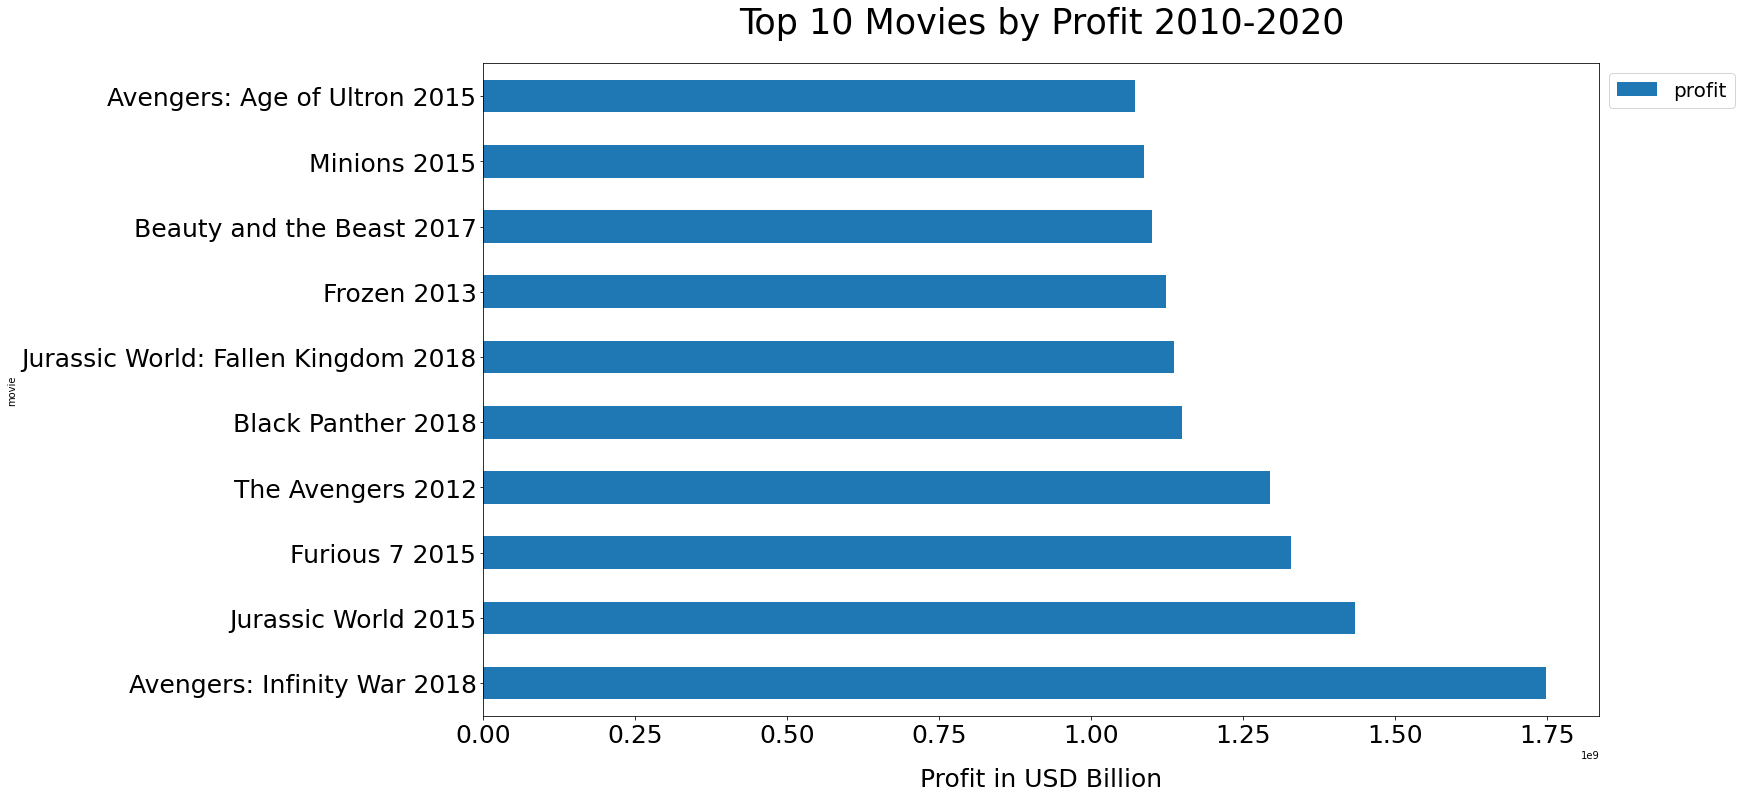

In [5]:
# Visualizing the top 10 movies by 'profit' 
# Bar chart
ax1 = top10_profit.plot(kind='barh', figsize=(20,12), fontsize=25)
        
ax1.set_xlabel("Profit in USD Billion", fontsize=25, labelpad=20)
ax1.set_title("Top 10 Movies by Profit 2010-2020", fontsize=35, pad=30)
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=20);

We found out the top 10 movies by profit and their directors.  The dirctor, Joss Whedon, appeared the most (2 times) in the top 10 movies by profit. 

However, based on this result, it is difficult to say that there is any correlation between directors' performance and the movies' success. We want to go back and check the previous dataframe with all the movies and see if there is any correlation between them at all. 

We will count the number of movies that each director made and calculate their total and average returns.  

Before investigating, we notice that the director column has nested lists. We would like to expand these so we have individaul director per row.

In [6]:
### Finding correlation between directors' performance and profit

In [7]:
# Creating a new dataframe 'individual_df' with 'director' column expanded to show individaul director per row
individual_df = q3_df.explode('director')
individual_df

,movie,profit,genres,director
0,Pirates of the Caribbean: On Stranger Tides 2011,635063875,"[Action, Adventure, Fantasy]",Rob Marshall
1,Dark Phoenix 2019,-200237650,"[Action, Adventure, Sci-Fi]",Simon Kinberg
2,Avengers: Age of Ultron 2015,1072413963,"[Action, Adventure, Sci-Fi]",Joss Whedon
3,Avengers: Infinity War 2018,1748134200,"[Action, Adventure, Sci-Fi]",Anthony Russo
3,Avengers: Infinity War 2018,1748134200,"[Action, Adventure, Sci-Fi]",Joe Russo
...,...,...,...,...
1478,Emily 2017,-23453,[Drama],Ryan Graves
1479,Exeter 2015,464792,"[Horror, Mystery, Thriller]",Marcus Nispel
1480,Dutch Kills 2015,-25000,"[Crime, Drama, Thriller]",Joseph Mazzella
1481,The Ridges 2011,-17300,"[Drama, Horror, Thriller]",Brandon Landers


In [8]:
# Counting movies made by each director
individual_df['director'].value_counts()

Tim Story             8
Clint Eastwood        7
Steven Spielberg      7
Ridley Scott          6
Jon M. Chu            6
                     ..
Peter Atencio         1
 Ronnie Del Carmen    1
Julian Gilbey         1
David G. Evans        1
Courtney Solomon      1
Name: director, Length: 1122, dtype: int64

In [9]:
# Creating a column that shows the number of movies made by the individual director
individual_df['#movies_by_director'] = individual_df.groupby(['director'])['movie'].transform('count')

In [10]:
# Creating columns that show the total profit and the average profit made by each director
individual_df['total_profit'] = individual_df.groupby(['director'])['profit'].transform('sum')
individual_df['avg_profit'] = individual_df.groupby(['director'])['profit'].transform('mean')
individual_df.head(10)

,movie,profit,genres,director,#movies_by_director,total_profit,avg_profit
0,Pirates of the Caribbean: On Stranger Tides 2011,635063875,"[Action, Adventure, Fantasy]",Rob Marshall,3,1003508794,3.345029e+08
1,Dark Phoenix 2019,-200237650,"[Action, Adventure, Sci-Fi]",Simon Kinberg,1,-200237650,-2.002376e+08
2,Avengers: Age of Ultron 2015,1072413963,"[Action, Adventure, Sci-Fi]",Joss Whedon,2,2365349860,1.182675e+09
3,Avengers: Infinity War 2018,1748134200,"[Action, Adventure, Sci-Fi]",Anthony Russo,3,3182605502,1.060869e+09
3,Avengers: Infinity War 2018,1748134200,"[Action, Adventure, Sci-Fi]",Joe Russo,3,3182605502,1.060869e+09
4,Justice League 2017,355945209,"[Action, Adventure, Fantasy]",Zack Snyder,5,1470920114,2.941840e+08
5,Spectre 2015,579620923,"[Action, Adventure, Thriller]",Sam Mendes,2,1490147904,7.450740e+08
6,The Dark Knight Rises 2012,809439099,"[Action, Thriller]",Christopher Nolan,4,2336180484,5.840451e+08
7,Solo: A Star Wars Story 2018,118151347,"[Action, Adventure, Fantasy]",Ron Howard,5,313141727,6.262835e+07
8,The Lone Ranger 2013,-14997885,"[Action, Adventure, Western]",Gore Verbinski,2,95726715,4.786336e+07


In [11]:
# Creating a new dataframe that shows the top 10 directors by their total profit
director_total = individual_df.loc[:, ['director', 'total_profit', '#movies_by_director', 'genres']]
director_total = director_total.drop_duplicates(subset='director')
director_total = director_total.set_index('director')
top10_director_total = director_total.sort_values(by='total_profit', ascending=False).head(10)
top10_director_total

,total_profit,#movies_by_director,genres
director,,,
Anthony Russo,3182605502,3,"[Action, Adventure, Sci-Fi]"
Joe Russo,3182605502,3,"[Action, Adventure, Sci-Fi]"
James Wan,2613617575,3,"[Action, Crime, Thriller]"
Joss Whedon,2365349860,2,"[Action, Adventure, Sci-Fi]"
Christopher Nolan,2336180484,4,"[Action, Thriller]"
Michael Bay,2263998250,4,"[Action, Adventure, Sci-Fi]"
Chris Renaud,2185431942,3,"[Adventure, Animation, Comedy]"
Peter Jackson,2172948044,3,"[Adventure, Family, Fantasy]"
Pierre Coffin,2046063923,2,"[Adventure, Animation, Comedy]"


In [12]:
# Checking correlation between the number of movies each director made and their total profit(performance)
director_total.corr()['#movies_by_director'].sort_values()

total_profit           0.507637
#movies_by_director    1.000000
Name: #movies_by_director, dtype: float64

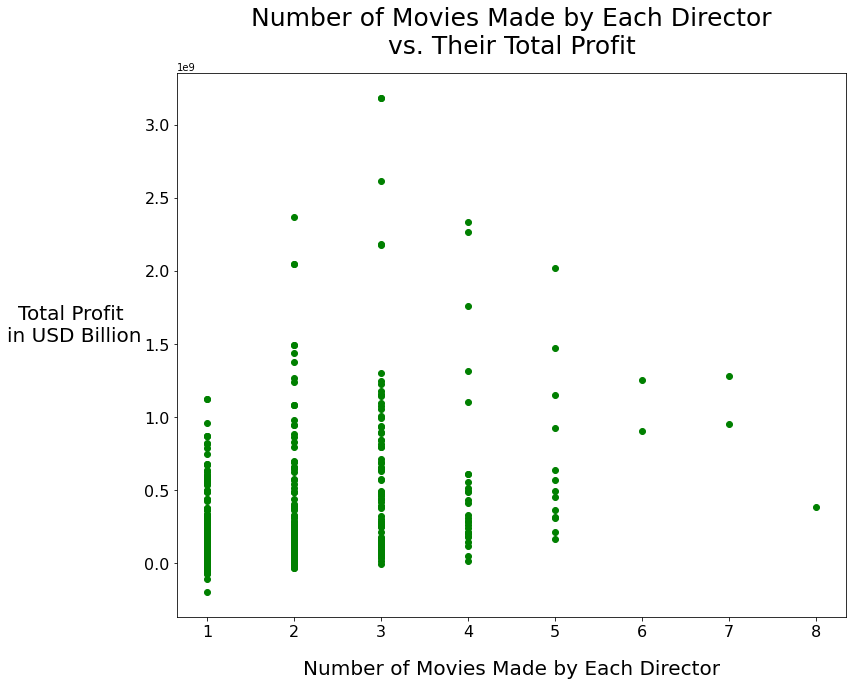

In [13]:
# Scatter plot of the relationship between the number of movies each director made and their total profit(performance)
fig, ax = plt.subplots(figsize=(12,10))

ax.scatter(director_total['#movies_by_director'], director_total['total_profit'], color="green")
ax.set_title("Number of Movies Made by Each Director\nvs. Their Total Profit", fontsize=25, pad=20)
ax.set_xlabel("Number of Movies Made by Each Director", fontsize=20, labelpad=20)
ax.set_ylabel("Total Profit \nin USD Billion", fontsize=20, labelpad=70, rotation=0);
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

With correlation being 0.50, we see that there is some correlation between the number of movies each director made and their total return. However, it also raises a question why the total profit goes up until the 3rd movies, but then it decreases after that point. This does not tell us a clear story. Thus, this time, we will check out the relationship between the number of movies each director made and their average return. 

In [14]:
# Creating a new dataframe that shows the top 10 directors by their average profit
director_avg = individual_df.loc[:, ['director', 'avg_profit', '#movies_by_director', 'genres']]
director_avg = director_avg.drop_duplicates(subset='director')
director_avg_index = director_avg.set_index('director')
top10_director_avg = director_avg_index.sort_values(by='avg_profit', ascending=False).head(10)
top10_director_avg

,avg_profit,#movies_by_director,genres
director,,,
Joss Whedon,1.182675e+09,2,"[Action, Adventure, Sci-Fi]"
Chris Buck,1.122470e+09,1,"[Adventure, Animation, Comedy]"
Jennifer Lee,1.122470e+09,1,"[Adventure, Animation, Comedy]"
Anthony Russo,1.060869e+09,3,"[Action, Adventure, Sci-Fi]"
Joe Russo,1.060869e+09,3,"[Action, Adventure, Sci-Fi]"
Kyle Balda,1.023032e+09,2,"[Adventure, Animation, Comedy]"
Pierre Coffin,1.023032e+09,2,"[Adventure, Animation, Comedy]"
Eric Guillon,9.597278e+08,1,"[Adventure, Animation, Comedy]"
James Wan,8.712059e+08,3,"[Action, Crime, Thriller]"


In [15]:
# Checking correlation between the number of movies each director made and their average profit(performance)
director_avg.corr()['#movies_by_director'].sort_values()

avg_profit             0.221385
#movies_by_director    1.000000
Name: #movies_by_director, dtype: float64

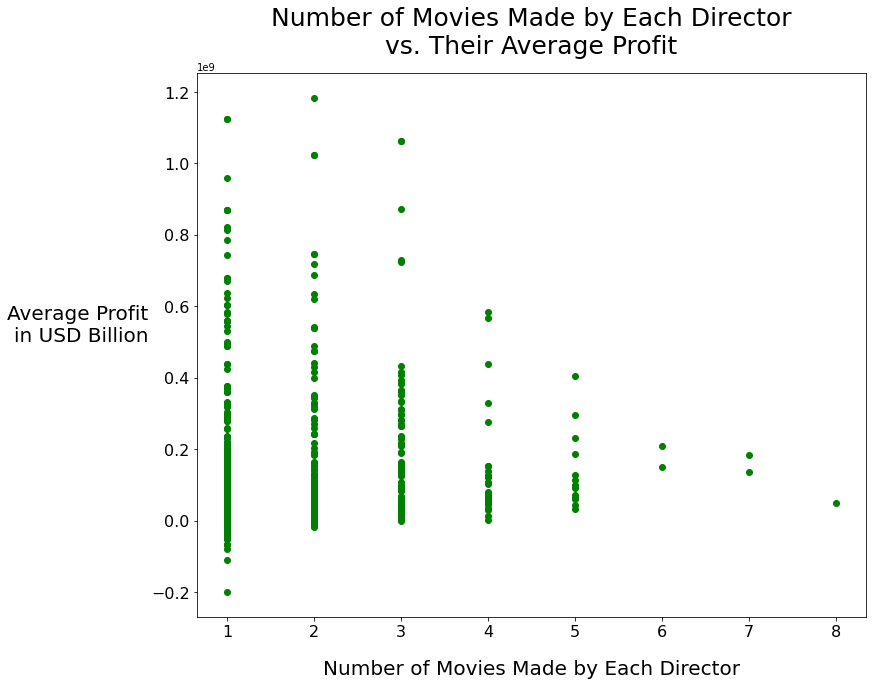

In [21]:
# Scatter plot of the relationship between the number of movies each director made and their average profit(performance)
fig, ax = plt.subplots(figsize=(12,10))

ax.scatter(director_avg['#movies_by_director'], director_avg['avg_profit'], color="green")
ax.set_title("Number of Movies Made by Each Director\nvs. Their Average Profit", fontsize=25, pad=20)
ax.set_xlabel("Number of Movies Made by Each Director", fontsize=20, labelpad=20)
ax.set_ylabel("Average Profit \nin USD Billion", fontsize=20, labelpad=70, rotation=0);
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

With correlation being 0.22, we see that there is no strong relationship between the number of movies each director made and their average return. However, we have a few interesting observations.

First, the directors who made more than 5 movies during 2010 - 2020 did not make the most profitable movies. However, they also did not lose money and made steady and modest profits.

Second, the most profitable movies were made by directors who produced 1 to 3 movies in that time. These movies did subtantially better than others, and therefore we could look deeper into them to find more insights.

We will investigate the genres that these top directors are good at making. 

In [17]:
# Expanding 'genres' column which has nested lists
# Counting the genres by top 10 director with highest average return
top10_director_avg = top10_director_avg.explode('genres')
top10_director_avg['genres'].value_counts()

Adventure    9
Comedy       6
Animation    6
Action       4
Sci-Fi       3
Crime        1
Thriller     1
Name: genres, dtype: int64

In [18]:
# Expanding 'genres' column which has nested lists
# Counting the genres by top 10 director with highest total return
top10_director_total = top10_director_total.explode('genres')
top10_director_total['genres'].value_counts()

Adventure    8
Action       6
Sci-Fi       4
Comedy       3
Animation    3
Thriller     2
Crime        1
Family       1
Fantasy      1
Name: genres, dtype: int64

# Conclusion: 

We see that these top directors make Aventure the most. This confirms the results of the previous anlysis on genres. 

On the other hand, we might not have enough data to draw any correlation between how many movies each director made and each of their profit. It was challenging to manipulate data through grouping by several elements in order to find a meaningful observation. 

Perhaps, we could gather more data and provide a suggested list of potential dirctors for Microsoft's new movie studio.



In [19]:
# Creating a function that returns all the data about the director
def get_profile(name, df):
    return df.loc[df['director'] == name]

get_profile('Steven Spielberg', individual_df)

,movie,profit,genres,director,#movies_by_director,total_profit,avg_profit
114,Ready Player One 2018,429290136,"[Action, Adventure, Sci-Fi]",Steven Spielberg,7,1280339795,182905685.0
132,The BFG 2016,59646680,"[Adventure, Family, Fantasy]",Steven Spielberg,7,1280339795,182905685.0
152,The Adventures of Tintin 2011,243993951,"[Action, Adventure, Animation]",Steven Spielberg,7,1280339795,182905685.0
294,War Horse 2011,86815529,"[Drama, History, War]",Steven Spielberg,7,1280339795,182905685.0
315,Lincoln 2012,208346281,"[Biography, Drama, History]",Steven Spielberg,7,1280339795,182905685.0
403,The Post 2017,129748880,"[Biography, Drama, History]",Steven Spielberg,7,1280339795,182905685.0
483,Bridge of Spies 2015,122498338,"[Drama, History, Thriller]",Steven Spielberg,7,1280339795,182905685.0


In [20]:
top10_avg = director_avg.sort_values(by='avg_profit', ascending=False).head(10)
top10_avg = list(top10_avg['director'])

def get_profile(name, df):
    for top in top10_avg:
        if top == name:
            return df.loc[df['director'] == name]
        else:
            None

get_profile('Anthony Russo', individual_df)

top10_directors = 

SyntaxError: invalid syntax (<ipython-input-20-7780a941ee29>, line 13)